# Project: Titanic survival predictions

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> **Tip**: The titanic data frames describe the survival status of individual passengers
on the Titanic. The titanic dataframe contains PassengerId, survived,Pclass,Name,Ag,Ticket,Fare and cabin.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


<a id='wrangling'></a>
## Data Wrangling

> **Tip**: In this section of the report, you will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. Make sure that you document your steps carefully and justify your cleaning decisions.

### General Properties

In [2]:
df=pd.read_csv("titanic-data.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
# get the data shape
df.shape

(891, 12)

In [4]:
#get the data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


* In cabin column there is only 204 rows not null ,and I think It's not effective column So let's drop it.

In [5]:
#get further types of columns which has type object
type(df["Name"][0])

str

In [6]:
type(df["Sex"][0])

str

In [7]:
type(df["Ticket"][0])

str

In [8]:
type(df["Embarked"][0])

str

#### Check if there is dublicates in the dataset


In [9]:
sum(df.duplicated())
#there is no dublicates in this dataset

0

#### Check if there is null values in the dataset

In [10]:
# there is no null values in this dataset
sum(df.isnull().sum())

866

In [11]:
#### Check unique values for Pclass
df["Pclass"].unique()

array([3, 1, 2])

In [12]:
#### Check unique values for Fare
df["Fare"].unique()

array([  7.25  ,  71.2833,   7.925 ,  53.1   ,   8.05  ,   8.4583,
        51.8625,  21.075 ,  11.1333,  30.0708,  16.7   ,  26.55  ,
        31.275 ,   7.8542,  16.    ,  29.125 ,  13.    ,  18.    ,
         7.225 ,  26.    ,   8.0292,  35.5   ,  31.3875, 263.    ,
         7.8792,   7.8958,  27.7208, 146.5208,   7.75  ,  10.5   ,
        82.1708,  52.    ,   7.2292,  11.2417,   9.475 ,  21.    ,
        41.5792,  15.5   ,  21.6792,  17.8   ,  39.6875,   7.8   ,
        76.7292,  61.9792,  27.75  ,  46.9   ,  80.    ,  83.475 ,
        27.9   ,  15.2458,   8.1583,   8.6625,  73.5   ,  14.4542,
        56.4958,   7.65  ,  29.    ,  12.475 ,   9.    ,   9.5   ,
         7.7875,  47.1   ,  15.85  ,  34.375 ,  61.175 ,  20.575 ,
        34.6542,  63.3583,  23.    ,  77.2875,   8.6542,   7.775 ,
        24.15  ,   9.825 ,  14.4583, 247.5208,   7.1417,  22.3583,
         6.975 ,   7.05  ,  14.5   ,  15.0458,  26.2833,   9.2167,
        79.2   ,   6.75  ,  11.5   ,  36.75  ,   7.7958,  12.5

In [13]:
#Check unique values for Embarked
df["Embarked"].unique()

array(['S', 'C', 'Q', nan], dtype=object)



### Data Cleaning 

#### We can get the total number of  relatives by adding a new column called Tot_Relatives which is the sumof Parch & SibSb

In [14]:
df['Tot_Relatives']=df['Parch']+df['SibSp']
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Tot_Relatives
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0


#### Firstly we need to drop columns passengerId , name,Ticket & cabin , We also should drop SibSp and Parch columns since we have the total number of them.

In [15]:
df.drop(['PassengerId', 'Name',"Ticket","Cabin","Parch","SibSp"], axis=1, inplace=True)

#### I think the Age feature is  important to survival, so we should probably attempt to fill the null values of the age.


In [16]:

df["Age"].describe()


count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [24]:
# filling the age null values with age mean
df["Age"].fillna(df["Age"].mean(),inplace=True)
df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Tot_Relatives
0,0,3,male,22.0,7.2500,S,1
1,1,1,female,38.0,71.2833,C,1
2,1,3,female,26.0,7.9250,S,0
3,1,1,female,35.0,53.1000,S,1
4,0,3,male,35.0,8.0500,S,0


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Survived       891 non-null    int64  
 1   Pclass         891 non-null    int64  
 2   Sex            891 non-null    object 
 3   Age            891 non-null    float64
 4   Fare           891 non-null    float64
 5   Embarked       889 non-null    object 
 6   Tot_Relatives  891 non-null    int64  
dtypes: float64(2), int64(3), object(2)
memory usage: 48.9+ KB


<a id='eda'></a>
## Exploratory Data Analysis

> **Tip**: Now that you've trimmed and cleaned your data, you're ready to move on to exploration. Compute statistics and create visualizations with the goal of addressing the research questions that you posed in the Introduction section. It is recommended that you be systematic with your approach. Look at one variable at a time, and then follow it up by looking at relationships between variables.

### Research Question 1 (What factors are important for us to know in order to predict if a passenger would survive or not?)

In [19]:
df_survived=df[df["Survived"]==1]
df_not_survived=df[df["Survived"]==0]


 * To get relationship between features and no-show for the appointment , let's create histograms for both distributions on the same plot


In [20]:
def plot_features(column_name,category_1,category_2):
    
    fg ,ax=plt.subplots(figsize=(10,8))
    ax.hist(category_1[column_name],alpha=0.5,label="Survived")
    ax.hist(category_2[column_name],alpha=0.5,label="Not survived")
    ax.set_title("Distributions of Survived and Not survived "+column_name)
    ax.set_xlabel(column_name)
    ax.set_ylabel("count")
    ax.legend(loc="upper right")
    plt.show()

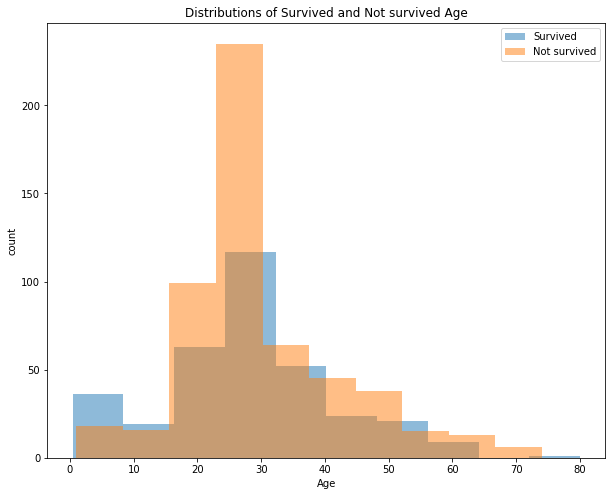

In [21]:
plot_features("Age",df_survived,df_not_survived)


#### From this graph we can conclude that
* from age 0 years (which can mean several months) to nearly 18 Years the no of survived is greater the no of not survived.
* At the adult age (from age of 18 to 30s ) the no of not survived is greater than the no of survived.



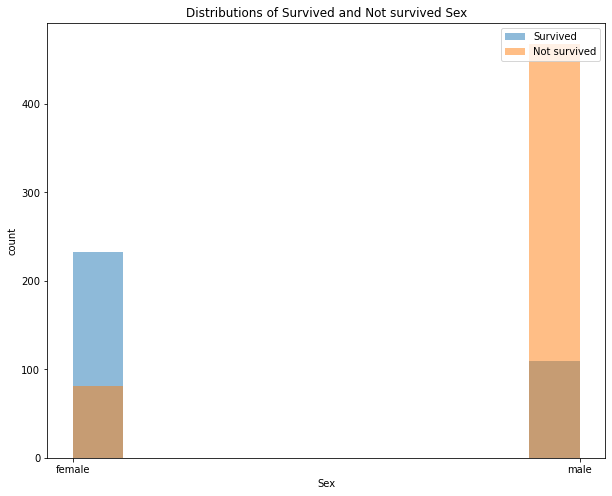

In [22]:
plot_features("Sex",df_survived,df_not_survived)


#### From this graph we can conclude that
* The number of males who did not survive are more than the number of females who didn't survive .
* Most of females survived.
* Most of males didn't survive.

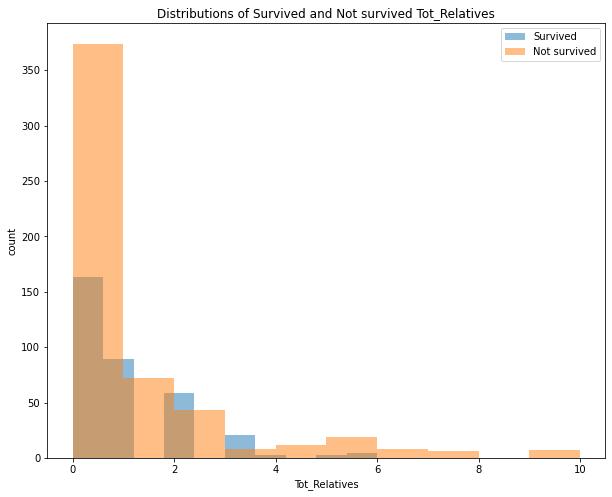

In [25]:
plot_features("Tot_Relatives",df_survived,df_not_survived)


#### From this graph we can conclude that
* People who has smaller number of relatives has more probabilty to survive.
* Most of females survived.
* Most of males didn't survive.

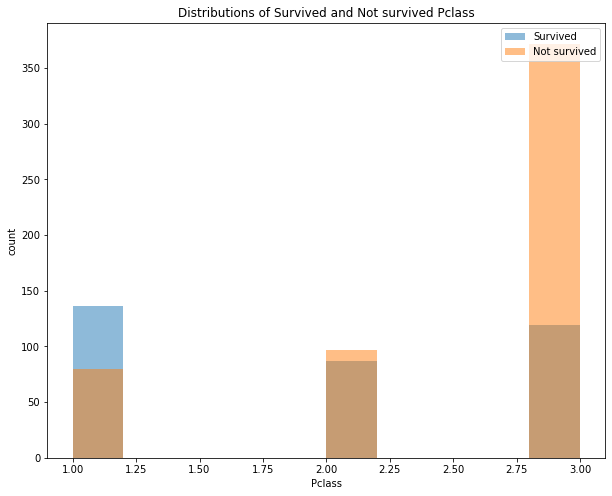

In [26]:
plot_features("Pclass",df_survived,df_not_survived)


#### From this graph we can conclude that
* Most of passengers in class 3 didn't survive.
* Most of passengers in class 1 survived.
* So that the probabilty to be survived in class1 is the most.



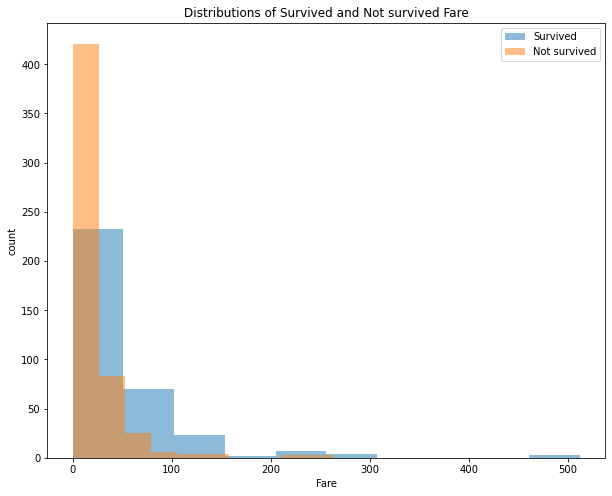

In [27]:
plot_features("Fare",df_survived,df_not_survived)

* The no of the not survived  passengers who paid a lower fare  is more than no of passengers who paid a higher fare .I think the fare can affect the location of the passengers in the ship thus it can affect their survival.

### Research Question 2  (Replace this header name!)

In [23]:
# Continue to explore the data to address your additional research
#   questions. Add more headers as needed if you have more questions to
#   investigate.


<a id='conclusions'></a>
## Conclusions

> **Tip**: Finally, summarize your findings and the results that have been performed. Make sure that you are clear with regards to the limitations of your exploration. If you haven't done any statistical tests, do not imply any statistical conclusions. And make sure you avoid implying causation from correlation!

> **Tip**: Once you are satisfied with your work, you should save a copy of the report in HTML or PDF form via the **File** > **Download as** submenu. Before exporting your report, check over it to make sure that the flow of the report is complete. You should probably remove all of the "Tip" quotes like this one so that the presentation is as tidy as possible. Congratulations!